# Data Analysis of Loan Eligibility Prediction

In [1]:
'''
This dataset contains information about loan eligibility prediction and i got this dataset from kaggle.

The columns in the given dataset are as follows:
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
'''

'\nThis dataset contains information about loan eligibility prediction and i got this dataset from kaggle.\n\nThe columns in the given dataset are as follows:\nLoan_ID\nGender\nMarried\nDependents\nEducation\nSelf_Employed\nApplicantIncome\nCoapplicantIncome\nLoanAmount\nLoan_Amount_Term\nCredit_History\nProperty_Area\nLoan_Status\n'

In [2]:
#importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#importing plotly library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()


In [4]:
df=pd.read_csv("Loan.csv")  #dataset

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.shape

(614, 13)

We have 614 rows and 13 columns in the dataset.

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

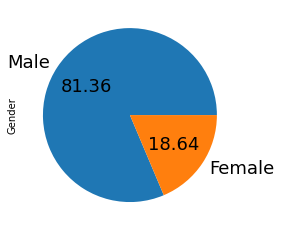

In [9]:
df.Gender.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

Male applicants are more as compared to female

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

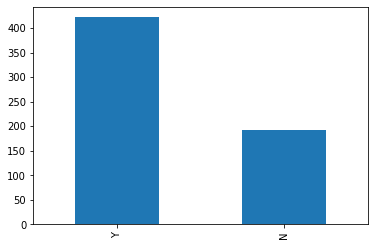

In [14]:
df['Loan_Status'].value_counts(normalize=True) 

df['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 were approved.

In [15]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

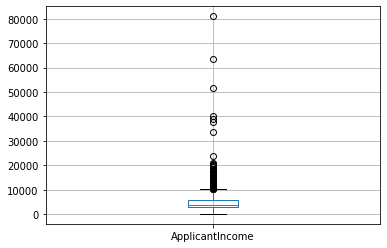

In [16]:
df.boxplot(column="ApplicantIncome")

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

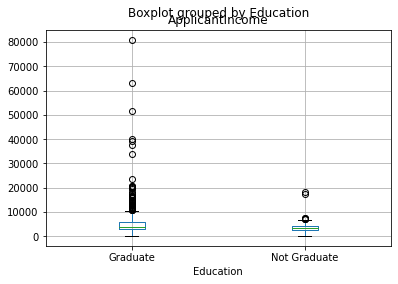

In [17]:
df.boxplot(column="ApplicantIncome",by="Education")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

<AxesSubplot:>

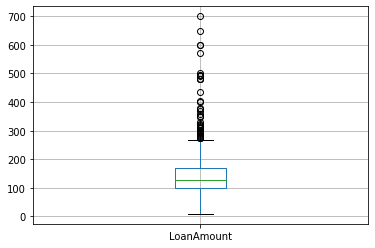

In [18]:
df.boxplot(column="LoanAmount")

We see a lot of outliers in this variable because some of the applicants have taken high amount of loan.

<AxesSubplot:>

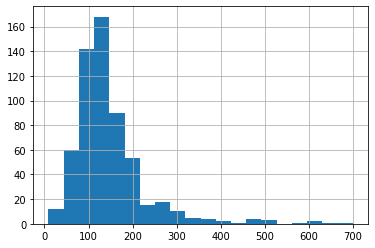

In [19]:
df['LoanAmount'].hist(bins=20)

In above fig. variable 'LogAmount' is right skewed so it is not normal

In [20]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']


<AxesSubplot:>

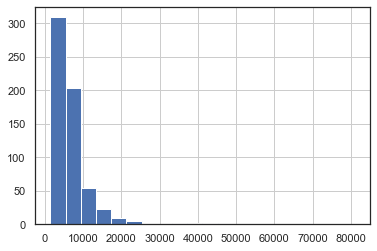

In [36]:
df['TotalIncome'].hist(bins=20)

In [22]:
sns.set(style="white")

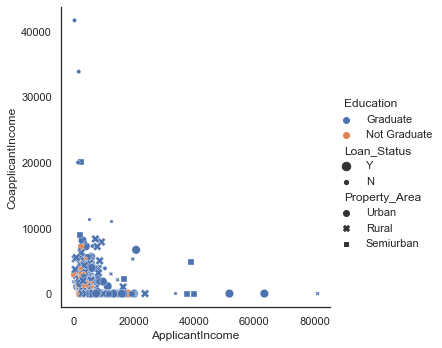

In [23]:
sns.relplot(x="ApplicantIncome",y="CoapplicantIncome",hue="Education",style="Property_Area",size="Loan_Status",height=5,aspect=1,data=df)

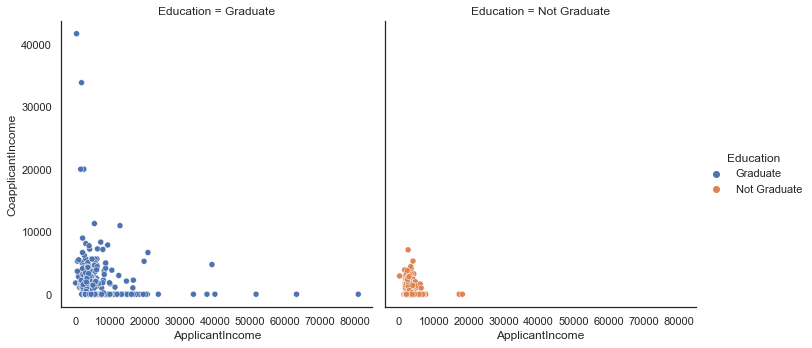

In [24]:
sns.relplot(x="ApplicantIncome",y="CoapplicantIncome",hue="Education",col="Education",data=df)

Graduates are earning more as compared to Non Graduates.

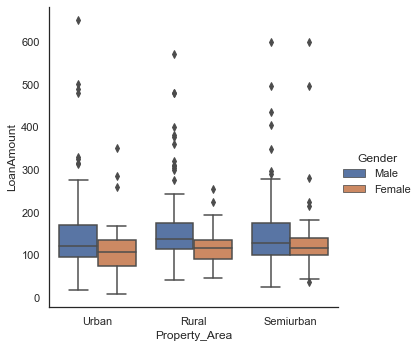

In [25]:
sns.catplot(x="Property_Area",y="LoanAmount",kind="box",data=df,hue="Gender",dodge=True)

<AxesSubplot:ylabel='Credit_History'>

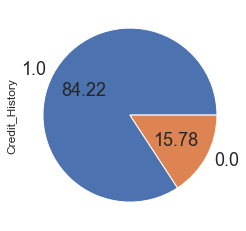

In [26]:
df.Credit_History.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

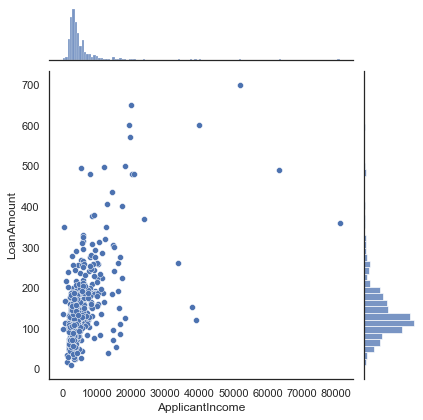

In [27]:
sns.jointplot(x=df["ApplicantIncome"],y=df["LoanAmount"])

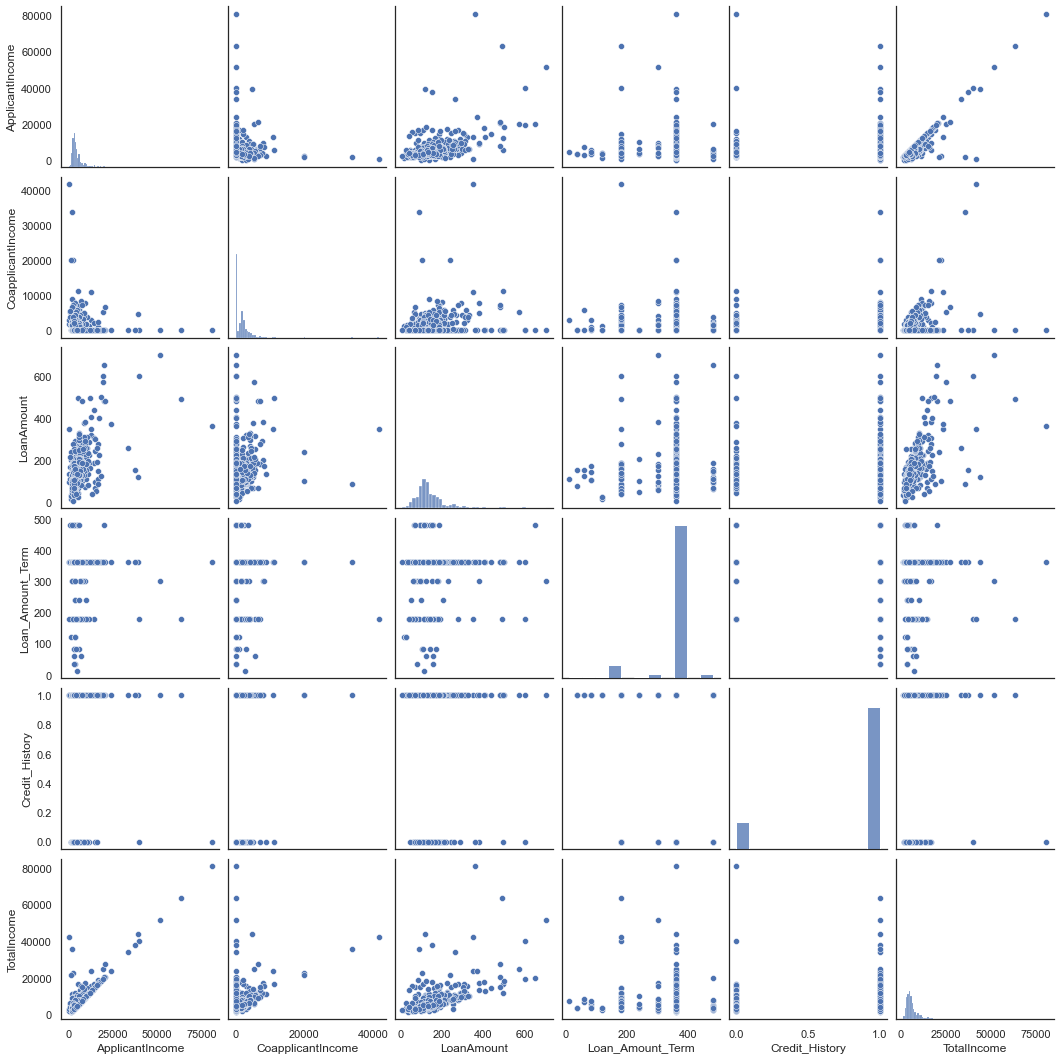

In [28]:
sns.pairplot(df)

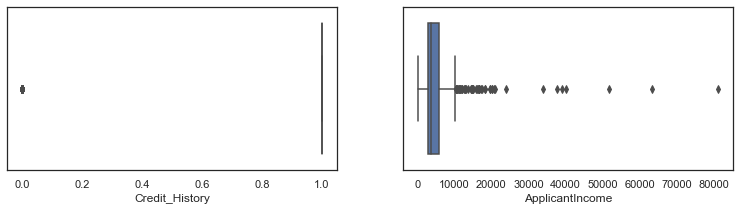

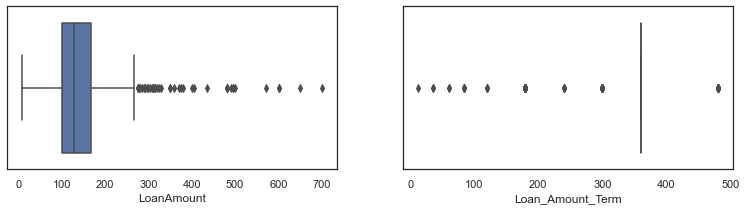

In [29]:
num_cols =['Credit_History','ApplicantIncome','LoanAmount','Loan_Amount_Term']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

1. Credit History will be 0 or 1.
2. Dataset has too much outliers.

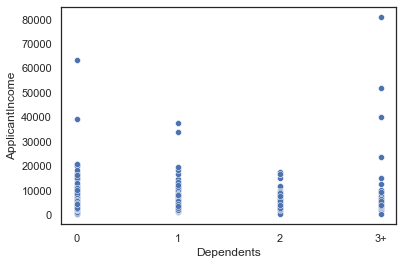

In [30]:
df1=sns.scatterplot(x="Dependents",y="ApplicantIncome",data=df)

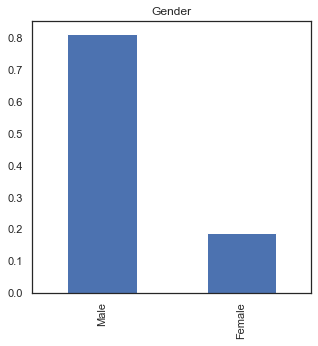

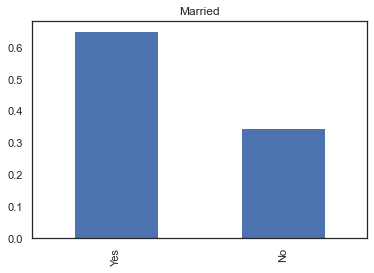

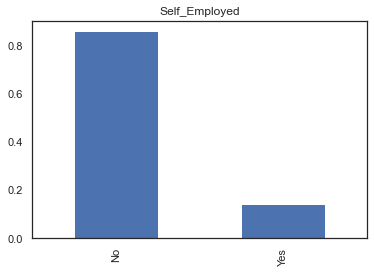

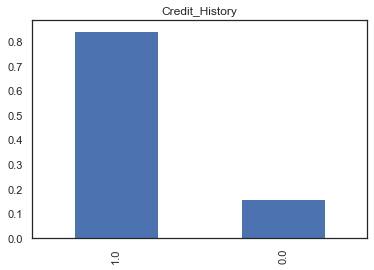

In [31]:
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Gender')
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

1. 80% of applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% of applicants in the dataset are self-employed.
4. Around 85% of applicants have repaid their doubts.

# Outliers in ApplicantIncome

In [32]:
df['ApplicantIncome'].quantile(0.99)

32540.410000000047

In [33]:
df[df['ApplicantIncome'] > df['ApplicantIncome'].quantile(0.99)].sort_values(by="ApplicantIncome",ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,81000.0
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,63337.0
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,51763.0
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999.0
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,43897.0
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,37719.0
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,33846.0


Highest Applicant Income is 81,000

In [34]:
df.sort_values(by="LoanAmount")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
568,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N,2378.0
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y,2385.0
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,3620.0
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y,3459.0
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y,6500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,N,4550.0
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N,6767.0
550,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N,6633.0
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural,Y,4867.0


<AxesSubplot:>

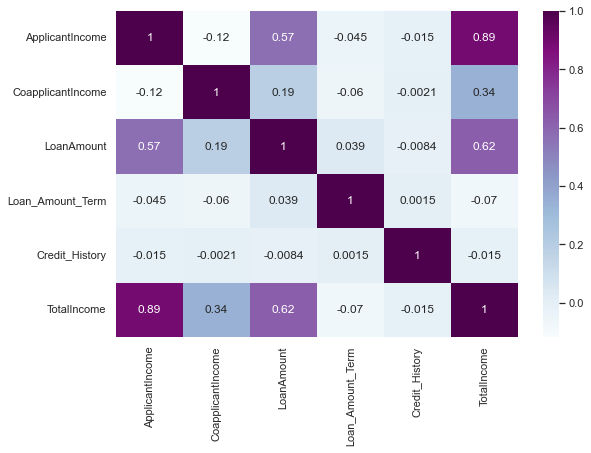

In [35]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")

1. We see that the most correlate variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Amount_Term).
2. LoanAmount is also correlated with CoapplicantIncome.